# Mapa Rosslerova atraktoru

In [1]:
# import všech potřebných knihoven - Numpy a Matplotlibu
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# funkce pro výpočet dalšího bodu Rosslerova atraktoru
def rossler(x, y, z, a=0.2, b=0.2, c=5.7):
    x_dot = -y - z
    y_dot = x + a*y
    z_dot = b + z*(x-c)
    return x_dot, y_dot, z_dot

In [3]:
# krok (změna času)
dt = 0.005

# celkový počet vypočtených bodů na Lorenzově atraktoru
n = 20000

# prozatím prázdné pole připravené pro výpočet
x = np.zeros((n,))
y = np.zeros((n,))
z = np.zeros((n,))

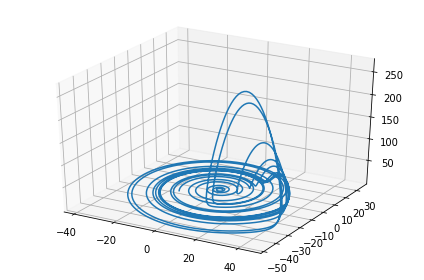

In [4]:
# počáteční hodnoty
x[0], y[0], z[0] = (1.0, 0.5, 1.05)

# vlastní výpočet atraktoru
for i in range(n-1):
    x_dot, y_dot, z_dot = rossler(x[i], y[i], z[i], 0.2, 0.2, 25.7)
    x[i+1] = x[i] + x_dot * dt
    y[i+1] = y[i] + y_dot * dt
    z[i+1] = z[i] + z_dot * dt

fig = plt.figure()
ax = fig.gca(projection='3d')

# vykreslení grafu
ax.plot(x, y, z)

# zobrazení grafu
plt.tight_layout()
plt.show()

In [5]:
WIDTH = 256
HEIGHT = 256
raster = np.zeros(shape=(HEIGHT, WIDTH, 3), dtype=np.uint8)

In [6]:
ax = 255.0/(max(x)-min(x))
ox = min(x)
ay = 255.0/(max(y)-min(y))
oy = min(y)
az = 255.0/(max(z)-min(z))
oz = min(z)

for yi in range(HEIGHT):
    # počáteční hodnoty
    x[0], y[0], z[0] = (1.0, 0.5, 1.05)

    # vlastní výpočet atraktoru
    c = 1.0 + yi/10.0
    for i in range(n-1):
        x_dot, y_dot, z_dot = rossler(x[i], y[i], z[i], 0.2, 0.2, c)
        x[i+1] = x[i] + x_dot * dt
        y[i+1] = y[i] + y_dot * dt
        z[i+1] = z[i] + z_dot * dt

    for xi in range(WIDTH):
        raster[yi][xi][0] = (x[xi*50] - ox) * ax
        raster[yi][xi][1] = (y[xi*50] - oy) * ay
        raster[yi][xi][2] = (z[xi*50] - oz) * az

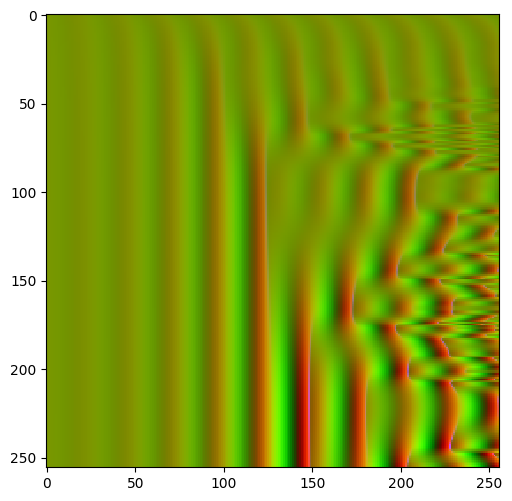

In [7]:
plt.figure(1, figsize=(8,6), dpi=100)
plt.imshow(raster)
plt.show()